# Librerias

In [1]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

# Datasets

In [2]:
movies = pd.read_csv('movies_dataset.csv')
movies.head(3)

C:\Users\Ines Sadir\AppData\Local\Temp\ipykernel_11180\3614830483.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies = pd.read_csv('movies_dataset.csv')


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0


In [3]:
print(movies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
print(movies.duplicated().sum())
movies.drop_duplicates(inplace=True)

13


In [5]:
movies.isna().sum()

adult                        0
belongs_to_collection    40959
budget                       0
genres                       0
homepage                 37673
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25045
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [6]:
credits = pd.read_csv('credits.csv')
credits.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [7]:
print(credits.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB
None


# Transformaciones

## Eliminar las columnas que no serán utilizadas, **`video`**,**`imdb_id`**,**`adult`**,**`original_title`**,**`poster_path`** y **`homepage`**

In [8]:
movies.drop(["video","imdb_id","adult","original_title","poster_path","homepage"], axis=1, inplace=True)
movies.head(3)

,belongs_to_collection,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,7.7,5415.0
1,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,6.9,2413.0
2,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,6.5,92.0


### Además se eliminan otras columnas: **`belong_to_colection`** (muchos faltantes), **`production_companies`** (irrelevante), **`spoken_languajes`** (redundante) y **`tagline`** (muchos faltantes e irrelevante)

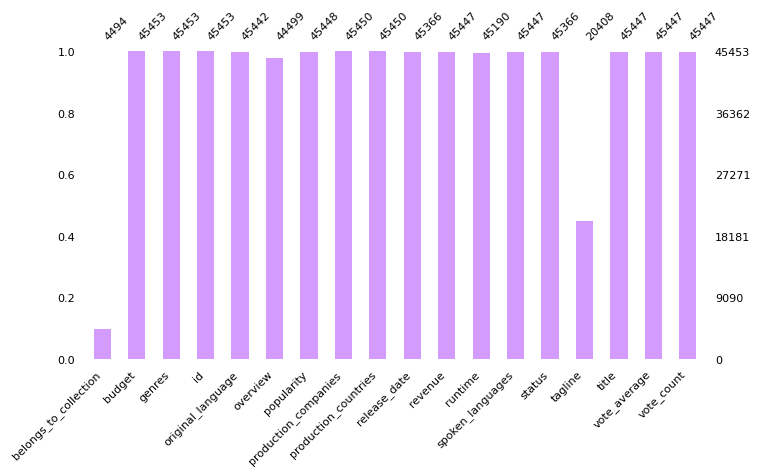

In [9]:
msno.bar(movies, figsize=(8, 4), color=['#d29bfd'], fontsize=8)
plt.show()

In [10]:
movies.drop(['belongs_to_collection', 'production_companies', 'spoken_languages', 'tagline' ], axis=1, inplace=True)
movies.head()

,budget,genres,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0


## Dar formato **`AAAA-mm-dd`** a las fechas

In [11]:
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d', errors='coerce')
movies[movies['release_date'].isnull()].shape[0]

90

In [12]:
movies.dtypes

budget                          object
genres                          object
id                              object
original_language               object
overview                        object
popularity                      object
production_countries            object
release_date            datetime64[ns]
revenue                        float64
runtime                        float64
status                          object
title                           object
vote_average                   float64
vote_count                     float64
dtype: object

## Eliminar valores nulos de **`release date`**

In [13]:
print(movies["release_date"].isnull().sum())
nulos = movies[movies["release_date"].isnull()]
nulos.head(3)

90


,budget,genres,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count
711,0,[],365371,en,Seven New Zealand women speak about their live...,0.005625,[],NaT,0.0,95.0,Released,War Stories Our Mother Never Told Us,0.0,0.0
734,0,[],215107,en,Vermont is for Lovers is an independently prod...,0.75,[],NaT,0.0,88.0,Released,Vermont Is for Lovers,0.0,0.0
3460,0,"[{'id': 18, 'name': 'Drama'}]",94214,en,"Jails, Hospitals &amp; Hip-Hop is a cinematic ...",0.009057,[],NaT,10.0,90.0,NaN,"Jails, Hospitals & Hip-Hop",0.0,0.0


In [14]:
movies.dropna(subset=["release_date"], inplace = True)
print(movies["release_date"].isnull().sum())

0


## Crear la columna **`release_year`**

In [15]:
movies['release_year']= movies['release_date'].dt.year
movies.head()

,budget,genres,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year
0,30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995
1,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995
2,0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,1995
3,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995
4,0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995


## Rellenar los valores nulos de los campos **`revenue`** y **`budget`** 

In [16]:
print(movies['revenue'].isna().sum())
print(movies['budget'].isna().sum())

0
0


In [17]:
movies["budget"] = movies["budget"].fillna(0)
movies["revenue"] = movies["revenue"].fillna(0)

In [18]:
print(movies['revenue'].isna().sum())
print(movies['budget'].isna().sum())

0
0


## Crear la columna con el retorno de inversión, llamada **`return`** con los campos **`revenue`** y **`budget`**

In [19]:
movies[['revenue','budget']].dtypes

revenue    float64
budget      object
dtype: object

In [20]:
movies['budget'] = movies['budget'].astype(float)

In [21]:
movies['revenue'].describe()

count    4.536300e+04
mean     1.123331e+07
std      6.439890e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

In [22]:
movies['budget'].describe()

count    4.536300e+04
mean     4.233796e+06
std      1.744222e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      3.800000e+08
Name: budget, dtype: float64

In [23]:
movies['return'] = movies.apply(lambda row: row['revenue'] / row['budget'] if row['budget'] != 0 else 0 , axis=1)
movies.head()

,budget,genres,id,original_language,overview,popularity,production_countries,release_date,revenue,runtime,status,title,vote_average,vote_count,release_year,return
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,Released,Toy Story,7.7,5415.0,1995,12.451801
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,Released,Jumanji,6.9,2413.0,1995,4.043035
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.7129,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,Released,Grumpier Old Men,6.5,92.0,1995,0.000000
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,Released,Waiting to Exhale,6.1,34.0,1995,5.090760
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,Released,Father of the Bride Part II,5.7,173.0,1995,0.000000


## Desanidar columnas json


In [24]:
from ast import literal_eval
import json

In [25]:
print(movies['genres'].iloc[1])
print(movies['production_countries'].iloc[1])

[{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 10751, 'name': 'Family'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]


In [26]:
movies['genres'] = movies['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [27]:
movies['production_countries'] = movies['production_countries'].fillna('[]').apply(literal_eval).apply(lambda x: [i['iso_3166_1'] for i in x] if isinstance(x, list) else [])

In [28]:
movies[['genres', 'production_countries']]

,genres,production_countries
0,"[Animation, Comedy, Family]",[US]
1,"[Adventure, Fantasy, Family]",[US]
2,"[Romance, Comedy]",[US]
3,"[Comedy, Drama, Romance]",[US]
4,[Comedy],[US]
...,...,...
45460,"[Drama, Action, Romance]","[CA, DE, GB, US]"
45462,[Drama],[PH]
45463,"[Action, Drama, Thriller]",[US]
45464,[],[RU]


In [29]:
print(credits['cast'].iloc[1])
print(credits['crew'].iloc[1])

[{'cast_id': 1, 'character': 'Alan Parrish', 'credit_id': '52fe44bfc3a36847f80a7c73', 'gender': 2, 'id': 2157, 'name': 'Robin Williams', 'order': 0, 'profile_path': '/sojtJyIV3lkUeThD7A2oHNm8183.jpg'}, {'cast_id': 8, 'character': 'Samuel Alan Parrish / Van Pelt', 'credit_id': '52fe44bfc3a36847f80a7c99', 'gender': 2, 'id': 8537, 'name': 'Jonathan Hyde', 'order': 1, 'profile_path': '/7il5D76vx6QVRVlpVvBPEC40MBi.jpg'}, {'cast_id': 2, 'character': 'Judy Sheperd', 'credit_id': '52fe44bfc3a36847f80a7c77', 'gender': 1, 'id': 205, 'name': 'Kirsten Dunst', 'order': 2, 'profile_path': '/wBXvh6PJd0IUVNpvatPC1kzuHtm.jpg'}, {'cast_id': 24, 'character': 'Peter Shepherd', 'credit_id': '52fe44c0c3a36847f80a7ce7', 'gender': 0, 'id': 145151, 'name': 'Bradley Pierce', 'order': 3, 'profile_path': '/j6iW0vVA23GQniAPSYI6mi4hiEW.jpg'}, {'cast_id': 10, 'character': 'Sarah Whittle', 'credit_id': '52fe44bfc3a36847f80a7c9d', 'gender': 1, 'id': 5149, 'name': 'Bonnie Hunt', 'order': 4, 'profile_path': '/7spiVQwmr8

In [30]:
credits['cast'] = credits['cast'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])

In [31]:
credits['cast'].iloc[1]

['Robin Williams',
 'Jonathan Hyde',
 'Kirsten Dunst',
 'Bradley Pierce',
 'Bonnie Hunt',
 'Bebe Neuwirth',
 'David Alan Grier',
 'Patricia Clarkson',
 'Adam Hann-Byrd',
 'Laura Bell Bundy',
 'James Handy',
 'Gillian Barber',
 'Brandon Obray',
 'Cyrus Thiedeke',
 'Gary Joseph Thorup',
 'Leonard Zola',
 'Lloyd Berry',
 'Malcolm Stewart',
 'Annabel Kershaw',
 'Darryl Henriques',
 'Robyn Driscoll',
 'Peter Bryant',
 'Sarah Gilson',
 'Florica Vlad',
 'June Lion',
 'Brenda Lockmuller']

In [32]:
credits['cast'] = credits['cast'].str[:3]

In [33]:
def extraer_director(crew):
    for credit in crew:
        if credit['job'] == 'Director':
            return credit['name']
    return None

In [34]:
credits['director'] = credits['crew'].apply(literal_eval).apply(extraer_director)

In [35]:
credits.drop(['crew'], axis=1, inplace=True)

In [36]:
credits.head()

,cast,id,director
0,"[Tom Hanks, Tim Allen, Don Rickles]",862,John Lasseter
1,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",8844,Joe Johnston
2,"[Walter Matthau, Jack Lemmon, Ann-Margret]",15602,Howard Deutch
3,"[Whitney Houston, Angela Bassett, Loretta Devine]",31357,Forest Whitaker
4,"[Steve Martin, Diane Keaton, Martin Short]",11862,Charles Shyer


# Tabla transformada

In [38]:
movies['id'] = movies['id'].astype(int)

In [39]:
common_ids = set(movies['id']).intersection(set(credits['id']))
len(common_ids)

45345

In [40]:
movies_df = pd.merge(movies, credits, on='id', how='inner')

In [41]:
movies_df = movies_df[['id', 'title', 'cast', 'director', 'release_date', 'release_year', 'genres', 'budget', 'revenue', 'return', 'runtime', 'status', 'original_language', 'production_countries', 'popularity', 'vote_average', 'vote_count', 'overview']]
movies_df

,id,title,cast,director,release_date,release_year,genres,budget,revenue,return,runtime,status,original_language,production_countries,popularity,vote_average,vote_count,overview
0,862,Toy Story,"[Tom Hanks, Tim Allen, Don Rickles]",John Lasseter,1995-10-30,1995,"[Animation, Comedy, Family]",30000000.0,373554033.0,12.451801,81.0,Released,en,[US],21.946943,7.7,5415.0,"Led by Woody, Andy's toys live happily in his ..."
1,8844,Jumanji,"[Robin Williams, Jonathan Hyde, Kirsten Dunst]",Joe Johnston,1995-12-15,1995,"[Adventure, Fantasy, Family]",65000000.0,262797249.0,4.043035,104.0,Released,en,[US],17.015539,6.9,2413.0,When siblings Judy and Peter discover an encha...
2,15602,Grumpier Old Men,"[Walter Matthau, Jack Lemmon, Ann-Margret]",Howard Deutch,1995-12-22,1995,"[Romance, Comedy]",0.0,0.0,0.000000,101.0,Released,en,[US],11.7129,6.5,92.0,A family wedding reignites the ancient feud be...
3,31357,Waiting to Exhale,"[Whitney Houston, Angela Bassett, Loretta Devine]",Forest Whitaker,1995-12-22,1995,"[Comedy, Drama, Romance]",16000000.0,81452156.0,5.090760,127.0,Released,en,[US],3.859495,6.1,34.0,"Cheated on, mistreated and stepped on, the wom..."
4,11862,Father of the Bride Part II,"[Steve Martin, Diane Keaton, Martin Short]",Charles Shyer,1995-02-10,1995,[Comedy],0.0,76578911.0,0.000000,106.0,Released,en,[US],8.387519,5.7,173.0,Just when George Banks has recovered from his ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45418,30840,Robin Hood,"[Patrick Bergin, Uma Thurman, David Morrissey]",John Irvin,1991-05-13,1991,"[Drama, Action, Romance]",0.0,0.0,0.000000,104.0,Released,en,"[CA, DE, GB, US]",5.683753,5.7,26.0,"Yet another version of the classic epic, with ..."
45419,111109,Century of Birthing,"[Angel Aquino, Perry Dizon, Hazel Orencio]",Lav Diaz,2011-11-17,2011,[Drama],0.0,0.0,0.000000,360.0,Released,tl,[PH],0.178241,9.0,3.0,An artist struggles to finish his work while a...
45420,67758,Betrayal,"[Erika Eleniak, Adam Baldwin, Julie du Page]",Mark L. Lester,2003-08-01,2003,"[Action, Drama, Thriller]",0.0,0.0,0.000000,90.0,Released,en,[US],0.903007,3.8,6.0,"When one of her hits goes wrong, a professiona..."
45421,227506,Satan Triumphant,"[Iwan Mosschuchin, Nathalie Lissenko, Pavel Pa...",Yakov Protazanov,1917-10-21,1917,[],0.0,0.0,0.000000,87.0,Released,en,[RU],0.003503,0.0,0.0,"In a small town live two brothers, one a minis..."


## Guardar tabla final

In [42]:
movies_df.to_csv('movies_df.csv', index=False)